In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded = files.upload()

Saving House_prediction.csv to House_prediction (8).csv


In [5]:
import io
df= pd.read_csv(io.BytesIO(uploaded['House_prediction.csv']))


In [6]:
print(df.head())

           city  area  rooms  bathroom  parking spaces floor     animal  \
0     São Paulo    70      2         1               1     7      acept   
1     São Paulo   320      4         4               0    20      acept   
2  Porto Alegre    80      1         1               1     6      acept   
3  Porto Alegre    51      2         1               0     2      acept   
4     São Paulo    25      1         1               0     1  not acept   

       furniture  hoa (R$)  rent amount (R$)  property tax (R$)  \
0      furnished      2065              3300                211   
1  not furnished      1200              4960               1750   
2  not furnished      1000              2800                  0   
3  not furnished       270              1112                 22   
4  not furnished         0               800                 25   

   fire insurance (R$)  total (R$)  
0                   42        5618  
1                   63        7973  
2                   41        3841 

In [7]:
df.columns.values


array(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype=object)

In [8]:
mean_data = df.groupby('city').mean()
print(mean_data)

                      area     rooms  bathroom  parking spaces     hoa (R$)  \
city                                                                          
Belo Horizonte  207.411765  3.020668  2.402226        1.955485  2324.197138   
Campinas        137.561547  2.355217  1.960141        1.558030   628.922626   
Porto Alegre    103.609388  2.140821  1.725901        1.044426   491.618609   
Rio de Janeiro  105.347768  2.243837  1.756163        0.744171  1079.432378   
São Paulo       158.899439  2.558859  2.467641        1.877527  1169.627994   

                rent amount (R$)  property tax (R$)  fire insurance (R$)  \
city                                                                       
Belo Horizonte       3664.127981         272.782194            53.675676   
Campinas             2364.290739         147.657679            32.388042   
Porto Alegre         2337.699916         124.021794            36.425817   
Rio de Janeiro       3232.904064         256.853431            42.

In [9]:
x_label = mean_data.index
print(x_label)
print(mean_data.columns.values)


Index(['Belo Horizonte', 'Campinas', 'Porto Alegre', 'Rio de Janeiro',
       'São Paulo'],
      dtype='object', name='city')
['area' 'rooms' 'bathroom' 'parking spaces' 'hoa (R$)' 'rent amount (R$)'
 'property tax (R$)' 'fire insurance (R$)' 'total (R$)']


In [10]:
area_label = mean_data.loc[:,'area']
rooms_label = mean_data.loc[:,'rooms']
bathroom_label = mean_data.loc[:,'bathroom']
parking_label = mean_data.loc[:,'parking spaces']
hoa_label = mean_data.loc[:,'hoa (R$)']
rent_label = mean_data.loc[:,'rent amount (R$)']
property_label = mean_data.loc[:,'property tax (R$)']
fire_label = mean_data.loc[:,'fire insurance (R$)']
total_label = mean_data.loc[:,'total (R$)']


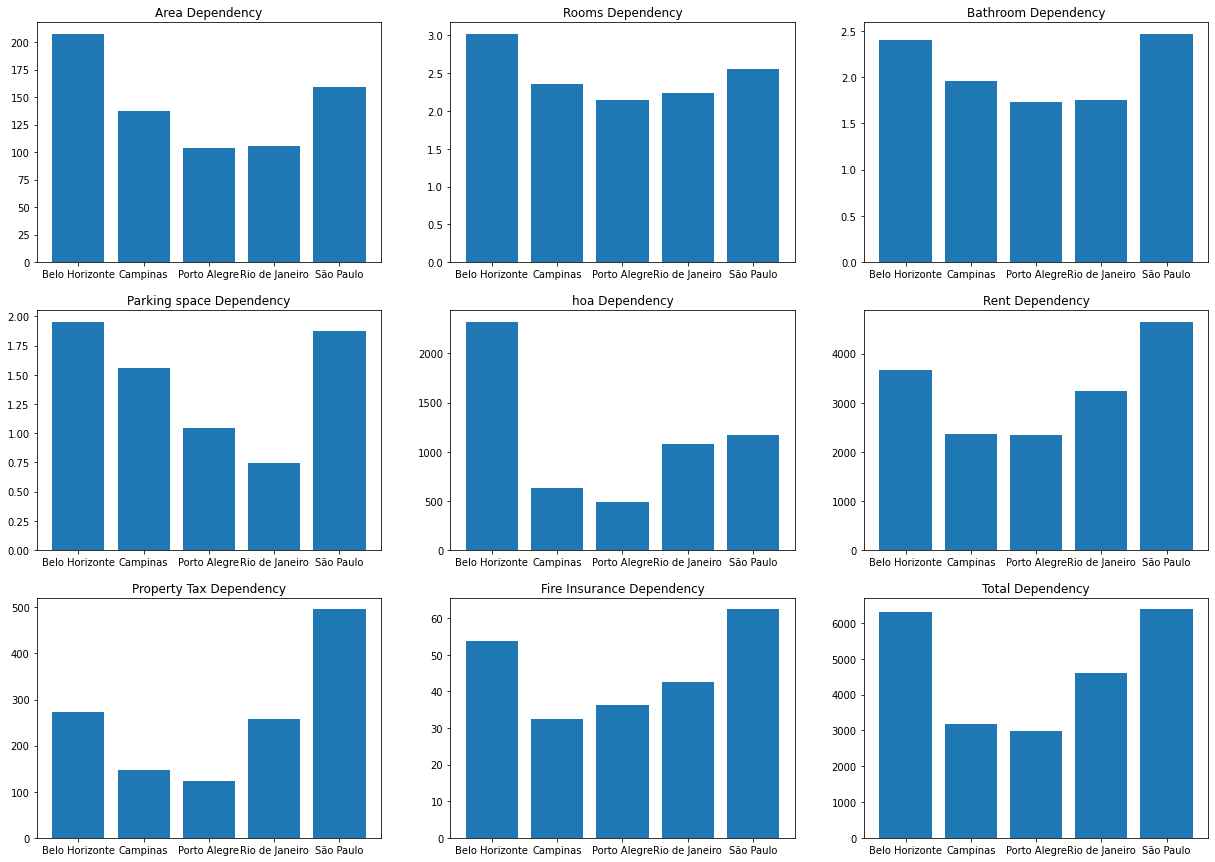

In [11]:
fig = plt.figure(figsize=(21,15))
ax1= fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)
ax8 = fig.add_subplot(338)
ax9 = fig.add_subplot(339)
ax1.bar(x_label,area_label)
ax1.set(title="Area Dependency")
ax2.bar(x_label,rooms_label)
ax2.set(title="Rooms Dependency")
ax3.bar(x_label,bathroom_label)
ax3.set(title="Bathroom Dependency")
ax4.bar(x_label,parking_label)
ax4.set(title="Parking space Dependency")
ax5.bar(x_label,hoa_label)
ax5.set(title="hoa Dependency")
ax6.bar(x_label,rent_label)
ax6.set(title="Rent Dependency")
ax7.bar(x_label,property_label)
ax7.set(title="Property Tax Dependency")
ax8.bar(x_label,fire_label)
ax8.set(title="Fire Insurance Dependency")
ax9.bar(x_label,total_label)
ax9.set(title="Total Dependency")
plt.show()

[Text(0, 0.5, 'number of floors'), Text(0.5, 0, 'house association tax')]

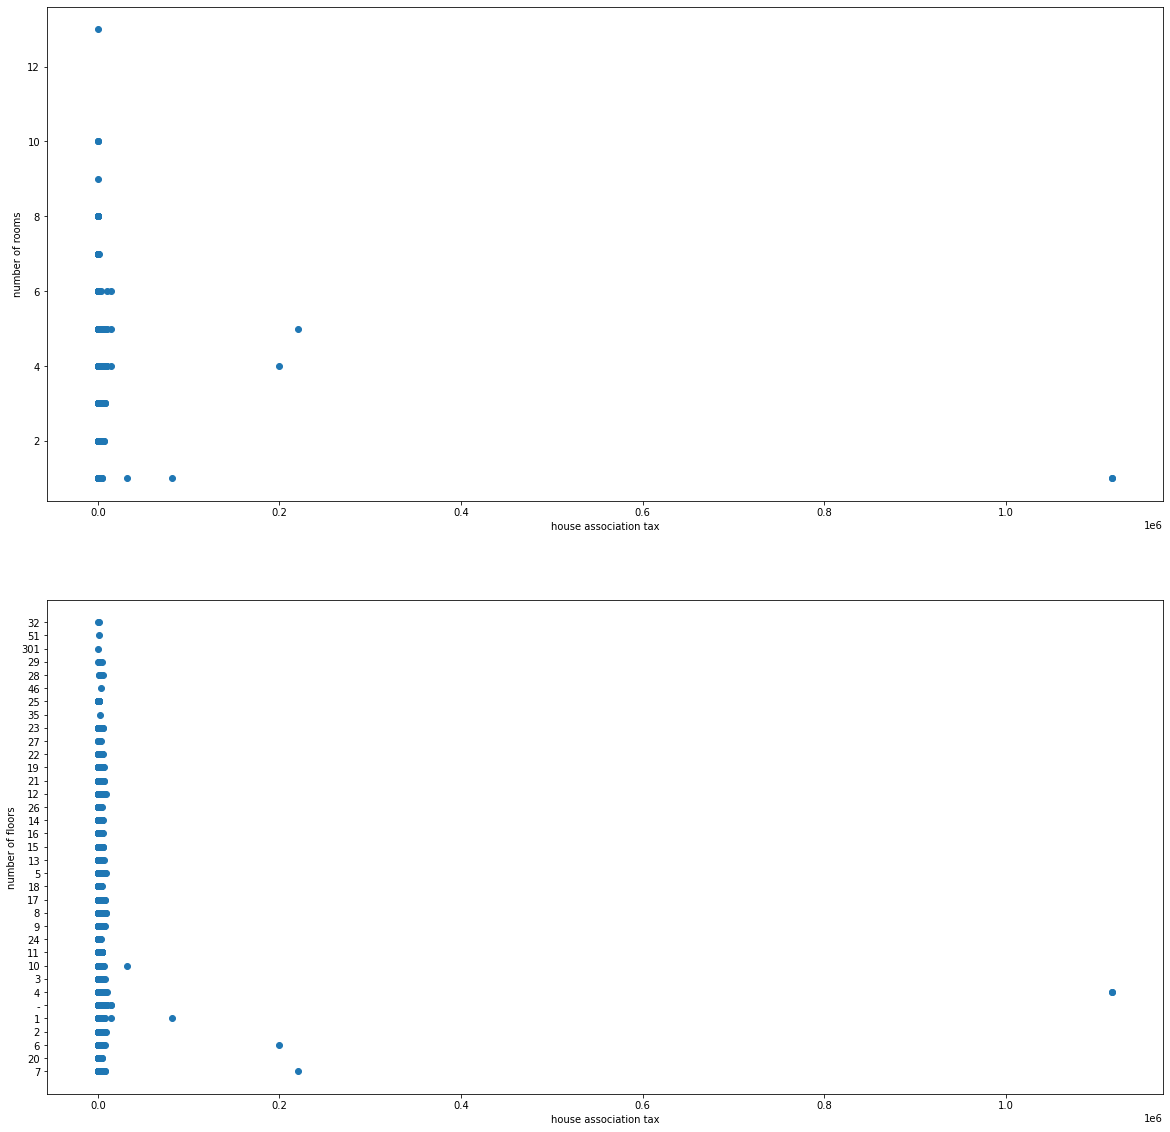

In [51]:
df.columns.values
hoa_rooms = df[['hoa (R$)','rooms']].sort_values('rooms')
# print(hoa_rooms.iloc[:,0])
fig = plt.figure(figsize=(20,20))
ax1= fig.add_subplot(211)
ax1.scatter(hoa_rooms.iloc[:,0],hoa_rooms.iloc[:,1] )
ax1.set(xlabel="house association tax",ylabel="number of rooms")

hoa_floor = df[['hoa (R$)','floor']]
ax2= fig.add_subplot(212)
ax2.scatter(hoa_floor.iloc[:,0],hoa_floor.iloc[:,1] )
ax2.set(xlabel="house association tax",ylabel="number of floors")



In [45]:
df.columns.values


array(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype=object)

<BarContainer object of 2 artists>

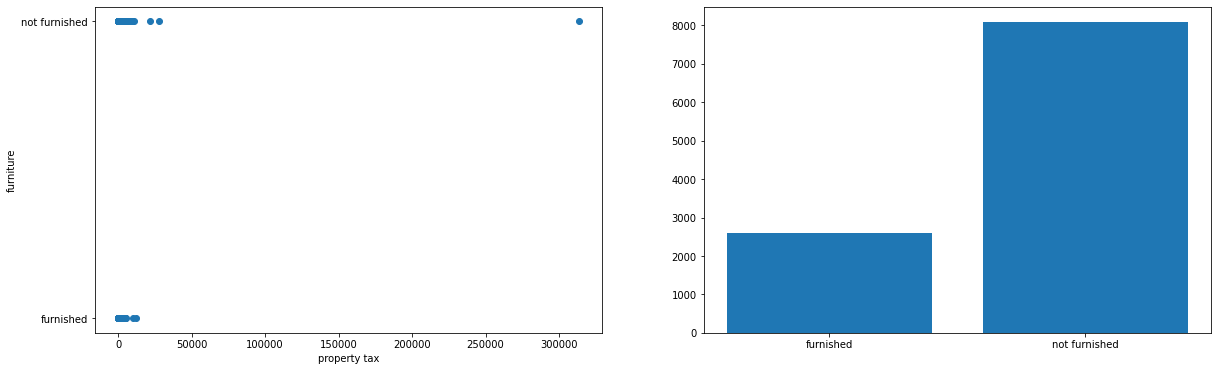

In [69]:
property_rooms = df[['property tax (R$)','furniture']]
# print(hoa_rooms.iloc[:,0])
fig = plt.figure(figsize=(20,6))
ax1= fig.add_subplot(121)
ax1.scatter(property_rooms.iloc[:,0],property_rooms.iloc[:,1] )
ax1.set(xlabel="property tax",ylabel="furniture")
count = df.groupby('furniture').count()
# print(count)
# hoa_floor = df[['hoa (R$)','floor']]
ax2= fig.add_subplot(122)
ax2.bar(count.index,count.iloc[:,1] )
# ax2.set(xlabel="house association tax",ylabel="number of floors")